# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
data_path="data/"
print(os.listdir())

['example.py', 'notes.txt', 'logs', 'data', '.ipynb_checkpoints', 'random_forest.ipynb', 'Neural_Network_Pytorch.ipynb', 'modeles', 'random_forest_gridsearch.ipynb', 'random_forest_minmax.ipynb', 'HTML', 'random_forest_MPN_sklearn.ipynb']


# Chargement des données
Utilisation d'une dataframe panda

In [2]:
data_files = os.listdir(data_path)
if (len(data_files) != 0):
    for datafile in data_files:
        if (not datafile[0] == "."):
            print(datafile)
            df = pd.read_csv(data_path + datafile, delimiter =";", decimal=",")
            break
        
df = pd.read_csv(data_path + 'DP980Y700_SDG3_2021_extended.csv', delimiter =";", decimal=",")

DP980Y700_SDG3_2021.csv


# Description des données

In [3]:
df.head()

,Coilnr,Date,Direction,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,n x1000,r x100,Re/Rm,...,After Soaking P3(C),After rapid cooling P4(C),Linespeed (m/min),Zink bottom (gr/m2),Zink top (gr/m2),SKP elongation (%),SKP Pressure (kN),C/s P1/P2,C/s P2/P3,C/s P3/P4
0,41971853,06-01-21,L,1.92,791,1058,107,63,68,75,...,800.987915,487.601574,51.922714,55.509306,54.877287,0.395166,8271.445498,1.223472,0.045591,-13.559891
1,41943566,08-01-21,L,1.01,690,1029,114,77,65,67,...,806.446350,497.245289,130.468628,60.863074,53.569768,0.453954,8263.117895,2.537354,0.113249,-33.617532
2,42071675,09-01-21,L,1.62,796,1037,106,60,67,77,...,818.309814,484.193967,78.013863,53.647423,53.234872,0.394861,7390.691312,1.634436,0.137986,-21.721390
3,42071668,09-01-21,L,1.62,745,1036,105,64,64,72,...,818.166443,481.330018,76.819946,53.221745,53.219945,0.394584,7435.146814,1.611650,0.092550,-21.563130
4,42071705,10-01-21,L,1.92,776,1006,95,62,68,77,...,796.503906,481.701958,63.891125,51.919579,54.494145,0.452333,6744.308326,1.550988,-0.254067,-16.760875


In [4]:
df.describe()

,Coilnr,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,n x1000,r x100,Re/Rm,Au x10%,FRT (C),...,After Soaking P3(C),After rapid cooling P4(C),Linespeed (m/min),Zink bottom (gr/m2),Zink top (gr/m2),SKP elongation (%),SKP Pressure (kN),C/s P1/P2,C/s P2/P3,C/s P3/P4
count,6.420000e+02,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,...,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,4.519242e+07,1.362336,755.992212,1021.789720,101.112150,61.928349,68.917445,73.953271,55.342679,934.241433,...,815.027914,483.340144,94.834979,55.849999,54.527488,0.399793,6908.133056,1.889156,0.163213,-26.214142
std,2.236331e+06,0.278166,43.104795,22.455107,14.728215,11.176132,5.268253,3.375279,7.754281,8.477701,...,6.169880,5.797254,20.600089,4.760644,4.498364,0.029070,1258.780634,0.428454,0.081252,5.730331
min,4.194357e+07,0.810000,658.000000,970.000000,59.000000,31.000000,40.000000,66.000000,31.000000,899.000000,...,795.607117,470.231511,51.922714,49.820602,48.877839,0.299066,4112.522876,0.655280,-0.291226,-41.335136
25%,4.333904e+07,1.160000,721.000000,1005.000000,92.000000,58.000000,66.000000,71.000000,50.000000,928.000000,...,810.318909,479.396075,78.744143,53.354118,52.429027,0.393439,5996.950708,1.586228,0.113834,-30.290847
50%,4.492826e+07,1.370000,763.500000,1023.000000,102.000000,64.000000,69.000000,75.000000,55.000000,934.000000,...,816.970734,482.803692,91.915077,54.355656,53.093873,0.394838,6808.134155,1.832388,0.158578,-25.169622
75%,4.703460e+07,1.570000,789.000000,1038.000000,111.000000,70.000000,72.000000,76.000000,60.000000,939.000000,...,819.839996,485.905191,108.873264,56.232747,54.570220,0.395494,7732.074367,2.179740,0.209342,-21.745432
max,4.956658e+07,2.040000,851.000000,1082.000000,140.000000,83.000000,91.000000,81.000000,77.000000,960.000000,...,832.460266,509.319692,147.113602,80.683978,79.302885,0.516063,10000.037090,2.835752,0.674101,-13.559891


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Coilnr                      642 non-null    int64  
 1   Date                        642 non-null    object 
 2   Direction                   642 non-null    object 
 3   Th mm                       642 non-null    float64
 4   Re02 Mpa                    642 non-null    int64  
 5   Rm Mpa                      642 non-null    int64  
 6   A80 x10%                    642 non-null    int64  
 7   n x1000                     642 non-null    int64  
 8   r x100                      642 non-null    int64  
 9   Re/Rm                       642 non-null    int64  
 10  Au x10%                     642 non-null    int64  
 11  FRT (C)                     642 non-null    int64  
 12  CT (C)                      642 non-null    int64  
 13  C ppm                       642 non

# Separation du dataset en train-set et test-set

In [6]:
from sklearn.model_selection import train_test_split

filters = df[["Date", "Direction","Re/Rm"]]

target_re02 = df[["Re02 Mpa"]]
target_rm = df[["Rm Mpa"]]
target_A = df[["A80 x10%"]]

features = df.drop(target_A + target_re02 + target_rm + filters ,axis=1)


X_train,X_test,Y_train_rm,Y_test_rm = train_test_split(features,target_rm,test_size=0.20,random_state=0)
Y_train_rm = Y_train_rm.values.ravel()
Y_test_rm = Y_test_rm.values.ravel()

X_train_re02,X_test_re02,Y_train_re02,Y_test_re02 = train_test_split(features,target_re02,test_size=0.20,random_state=0)
Y_train_re02 = Y_train_re02.values.ravel()
Y_test_re02 = Y_test_re02.values.ravel()

X_train_A,X_test_A,Y_train_A,Y_test_A = train_test_split(features,target_A,test_size=0.20,random_state=0)
Y_train_A = Y_train_A.values.ravel()
Y_test_A = Y_test_A.values.ravel()

print(X_train.shape, X_test.shape, Y_train_rm.shape, Y_test_rm.shape)

(513, 35) (129, 35) (513,) (129,)


In [7]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[0.01741155 0.65853659 0.71153846 ... 0.44185357 0.41686421 0.72103924]
 [0.48983708 0.58536585 0.69230769 ... 0.38750481 0.50407749 0.65779253]
 [0.89229604 0.16260163 0.32692308 ... 0.50490733 0.45004342 0.50172416]
 ...
 [0.23651736 0.43902439 0.84615385 ... 0.69919286 0.55021778 0.52363684]
 [0.69257997 0.61788618 0.09615385 ... 0.46561577 0.41999492 0.70928422]
 [0.89231876 0.32520325 0.23076923 ... 0.66670327 0.37571968 0.48776456]]
[[0.14601817 0.65853659 0.55769231 ... 0.45485493 0.444232   0.70492419]
 [0.20323237 0.00813008 0.67307692 ... 0.6978607  0.53914643 0.25922535]
 [0.70998049 0.65853659 0.55769231 ... 0.46877691 0.44481219 0.72453794]
 ...
 [0.40602519 0.61788618 0.67307692 ... 0.44782663 0.51862492 0.71153367]
 [0.23667436 0.57723577 0.67307692 ... 0.4857337  0.38225895 0.65401553]
 [0.64074979 0.16260163 0.80769231 ... 0.78139403 0.54177568 0.27446277]]


# Modele de Régression

## Importation des métriques

In [8]:
from sklearn.metrics import r2_score, mean_squared_error

## Neural Network - Multi Perceptron Network

### Prédiction de la résistance mécanique $R_m$

In [15]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(bootstrap=False, 
                            max_depth=24, 
                            max_features=13,
                            min_samples_split=4, 
                            n_estimators=80, 
                            n_jobs=-1)

rfr.fit(X_train, Y_train_rm)
print(rfr.score(X_train, Y_train_rm))
print(rfr.score(X_test, Y_test_rm))

Y_pred_rfr = rfr.predict(X_test)
print(Y_pred_rfr.shape)
print(Y_test_rm.shape)

print("R2_score : ", r2_score(Y_test_rm, Y_pred_rfr))
print("MSE : ", mean_squared_error(Y_test_rm, Y_pred_rfr))

0.9979056240179686
0.6660823933442528
(129,)
(129,)
R2_score :  0.6660823933442523
MSE :  168.66123933435702


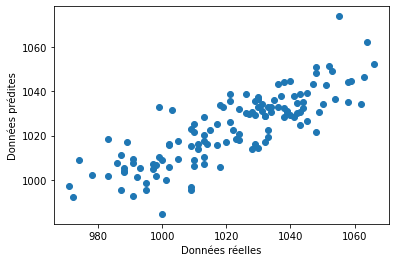

In [16]:
plt.plot( Y_test_rm, Y_pred_rfr, 'o')
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.show()

### Prédiction de la résistance élastique à 0.2% $R_{e0.2}$

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

mlp_re02 = MLPRegressor(solver = 'adam', activation='relu', learning_rate='adaptive', learning_rate_init=1e-3)


param_grid = { 
            "batch_size" : [8,16,32],
            "hidden_layer_sizes": [(i,j) for i in range(1,50,2) for j in range(10,40,2)],
            }

mlp_cv_re02 = GridSearchCV(mlp_re02, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
mlp_cv_re02.fit(X_train_re02, Y_train_re02)

print(mlp_cv_re02.best_estimator_, mlp_cv_re02.best_params_, mlp_cv_re02.best_score_)


Fitting 5 folds for each of 1125 candidates, totalling 5625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 5625 out of 5625 | elapsed: 19.2min finished


MLPRegressor(batch_size=8, hidden_layer_sizes=(1, 36), learning_rate='adaptive') {'batch_size': 8, 'hidden_layer_sizes': (1, 36)} -0.34851867323620533


In [22]:
best_mlp_re02 = mlp_cv_re02.best_estimator_
best_mlp_re02.fit(X_train_re02, Y_train_re02)
print(best_mlp_re02.score(X_train_re02, Y_train_re02))
print(best_mlp_re02.score(X_test_re02, Y_test_re02))

-0.9695249008176687
-1.259432422590618


(129,)
(129,)
R2_score :  -1.259432422590618
MSE :  4134.442805099536
Valeur réelle :  783 , Valeur prédite :  739.8598306198661 , |Delta| =  43.1401693801339
Valeur réelle :  766 , Valeur prédite :  747.0889834231754 , |Delta| =  18.911016576824636
Valeur réelle :  777 , Valeur prédite :  811.0987414555681 , |Delta| =  34.098741455568074
Valeur réelle :  727 , Valeur prédite :  737.404260994034 , |Delta| =  10.404260994033962
Valeur réelle :  818 , Valeur prédite :  837.2299320584685 , |Delta| =  19.229932058468535
Valeur réelle :  838 , Valeur prédite :  751.3134001312834 , |Delta| =  86.6865998687166
Valeur réelle :  797 , Valeur prédite :  751.4471459261664 , |Delta| =  45.5528540738336
Valeur réelle :  714 , Valeur prédite :  808.4336160773934 , |Delta| =  94.43361607739337
Valeur réelle :  658 , Valeur prédite :  751.3326372940616 , |Delta| =  93.33263729406156
Valeur réelle :  812 , Valeur prédite :  820.818066030141 , |Delta| =  8.81806603014104
Valeur réelle :  705 , Valeur pr

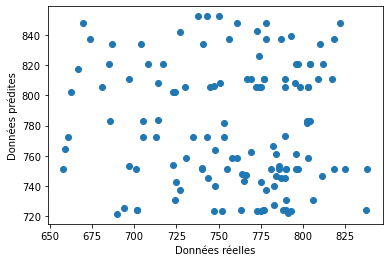

In [23]:
Y_pred_mln_re02 = best_mlp_re02.predict(X_test_re02)
print(Y_pred_mln_re02.shape)
print(Y_test_re02.shape)

print("R2_score : ", r2_score(Y_test_re02, Y_pred_mln_re02))
print("MSE : ", mean_squared_error(Y_test_re02, Y_pred_mln_re02))

for i in range(len(Y_test_re02)):
    print("Valeur réelle : ",Y_test_re02[i] ,", Valeur prédite : " ,Y_pred_mln_re02[i], ", |Delta| = ", abs(Y_test_re02[i] - Y_pred_mln_re02[i] ) )



plt.plot(Y_test_re02, Y_pred_mln_re02, 'o')
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.show()

### Prédiction de l'allongement à la rupture $A_\%$

In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr_A = RandomForestRegressor(  bootstrap=False, 
                                max_depth=20, 
                                max_features=17,
                                min_samples_split=4, 
                                n_estimators=110, 
                                n_jobs=-1)


rfr_A.fit(X_train_A, Y_train_A)
print(rfr_A.score(X_train_A, Y_train_A))
print(rfr_A.score(X_test_A, Y_test_A))

Y_pred_rfr_A = rfr_A.predict(X_test_A)
print(Y_pred_rfr_A.shape)
print(Y_test_A.shape)

print("R2_score : ", r2_score(Y_test_A, Y_pred_rfr_A))
print("MSE : ", mean_squared_error(Y_test_A, Y_pred_rfr_A))

0.9990224488480348
0.8416265240361097
(129,)
(129,)
R2_score :  0.8416265240361097
MSE :  33.70875842640646


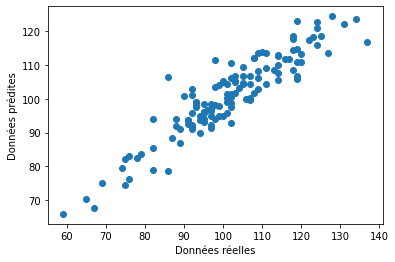

In [22]:
plt.plot( Y_test_A, Y_pred_rfr_A, 'o')
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.show()

# Enregistrement des modèles

In [23]:
import pickle

modele_path = "./modeles/"

# now you can save it to a file
with open(modele_path + 'random_forest_re02_3_extended.pkl.pkl', 'wb') as f:
    pickle.dump(rfr_re02, f)

with open(modele_path + 'random_forest_rm_3_extended.pkl.pkl', 'wb') as f:
    pickle.dump(rfr, f)
    
with open(modele_path + 'random_forest_A_3_extended.pkl.pkl', 'wb') as f:
    pickle.dump(rfr_A, f)  


# Chargement des modèles

In [24]:
import pickle
modele_path = "./modeles/"

with open(modele_path + 'random_forest_rm_3_extended.pkl', 'rb') as f:
    clf_rm = pickle.load(f)
print("-------------------------")
print("Résistance mécanique Rm")
print("-------------------------")
print("Train: ",clf_rm.score(X_train, Y_train_rm))
print("Test: ", clf_rm.score(X_test, Y_test_rm))

with open(modele_path + 'random_forest_re02_3_extended.pkl', 'rb') as f:
    clf_re02 = pickle.load(f)
    
print("-------------------------")
print("Résistance élastique Re02")
print("-------------------------")
print("Train: ", clf_re02.score(X_train_re02, Y_train_re02))
print("Test: ", clf_re02.score(X_test_re02, Y_test_re02))

with open(modele_path + 'random_forest_A_3_extended.pkl.pkl', 'rb') as f:
    clf_A = pickle.load(f)
print("-------------------------")
print("Allongement à la rupture A%")
print("-------------------------")
print("Train: ",clf_A.score(X_train_A, Y_train_A))
print("Test: ", clf_A.score(X_test_A, Y_test_A))


FileNotFoundError: [Errno 2] No such file or directory: './modeles/random_forest_rm_3_extended.pkl'